In [1]:
import re
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim import corpora, models, similarities
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
#iterator which tags each document with a string: name of the subdirectory in which it is located 
class DirOfPlainTextCorpus(object):
    def __init__(self, parentname):
        self.parentname = parentname

    def __iter__(self):
    for dirname in os.listdir(self.parentname):
        subdir = os.path.join(self.parentname, dirname)
        if os.path.isdir(subdir):
            for fn in os.listdir(subdir):
                text = open(os.path.join(subdir, fn)).read()
                yield TaggedDocument(text.split(), ['{}'.format(dirname)]) #different kinds of tags, e.g. individual document title or id can be added/substituted here

In [ ]:
#running the model..200 distributed memory 
model = Doc2Vec(DirOfPlainTextCorpus("parent directory"), dm=1, dbow_words=0, size=200, window=8, min_count=20, iter=20, workers=2)
print (model.docvecs)

In [ ]:
#saving the model to your local directory
model.save("name")

In [7]:
#load a model
model = Doc2Vec.load("name")

In [9]:
#some basic commands
#infer wordvector for "breakthrough"
model["breakthrough"]

array([ 2.12201166,  1.47777832, -1.60687912,  0.44895068, -0.12424453,
       -0.87678355, -1.38213658,  1.45538342,  0.94101405,  0.30149561,
        0.40820965, -1.38015437, -0.02577023, -2.0465014 ,  1.84592116,
        0.7373063 , -0.25662866,  1.58284676, -1.08641291, -0.9903208 ,
        1.66459382, -0.74285746, -0.61662614,  0.35474882,  1.55737507,
       -2.6954174 ,  1.66748273,  0.0786307 , -0.98789549,  0.90805995,
       -0.27667648,  1.37500679, -1.56249666, -1.64959967, -0.03604455,
        2.32731938,  0.43328971, -2.14058781, -0.83502823, -0.00671981,
        0.91924769,  0.95220006, -0.46417484,  1.3475256 ,  1.38562763,
       -0.61371994,  0.12309461, -0.51246089,  0.65227681,  1.04686069,
        0.64541179,  0.53702796,  0.70506382, -2.50823164, -0.89765763,
        2.44402504,  1.15351331, -0.25150871, -1.10809541, -0.65595704,
       -2.17733407,  0.32550189, -0.88088089,  0.0929867 ,  2.10231876,
       -0.45414287,  0.69620264,  1.82510364,  0.58042109, -0.44

In [10]:
#infer docvector for DMT 
model.docvecs["DMT"]

array([-0.59478521,  0.66990429,  0.04855514,  1.39688742,  0.75323641,
       -0.78101945, -0.79877138,  1.5533818 ,  1.48091793, -0.07356626,
       -0.25560293,  0.03205907,  0.8885839 ,  2.06512213, -0.63106889,
       -0.50872207, -0.15382871, -0.06665841, -1.49784815, -0.87108195,
        3.03727174, -0.26193801, -0.16582502,  0.8395375 ,  0.72907454,
       -2.11143255,  1.86878765,  0.33958307, -3.26231003,  1.08646929,
       -0.66114104,  0.88200784,  0.26791999, -2.01773429, -0.43476874,
        1.78680241,  1.93473911,  0.57613969, -0.38767245, -0.09930041,
        1.42746234,  1.16643739, -0.72762841, -1.89089668, -0.31899485,
        0.2930662 ,  0.4542554 ,  0.6441552 ,  1.73091006, -1.01212835,
        0.39886591,  0.31672418,  0.99086785, -1.11694169, -1.07665992,
        0.18431559,  0.11437342, -0.5719294 , -0.01435062, -1.43902111,
       -0.05000845,  1.66444016,  1.21248281, -1.58250701,  0.32353303,
        0.64843798, -0.44720295,  2.5789659 ,  1.20279181, -1.72

In [11]:
#Vector algebra with word vectors: boyfriend + female - male = ?
model.most_similar(positive=["boyfriend","female"],negative=["male"])

[('girlfriend', 0.5811253190040588),
 ('girl', 0.46536099910736084),
 ('friend', 0.39884936809539795),
 ('fiance', 0.3714718520641327),
 ('ex-girlfriend', 0.37015992403030396),
 ('roommate', 0.3693680167198181),
 ('roomates', 0.3596797585487366),
 ('partner', 0.3579680919647217),
 ('bf', 0.34675848484039307),
 ('ex-boyfriend', 0.34555962681770325)]

In [12]:
#30 most similar words to word: breakthrough
model.most_similar("breakthrough", topn = 30)

[('dmt', 0.38260823488235474),
 ('hyperspace', 0.3636336028575897),
 ('n-dmt', 0.35861852765083313),
 ('ayahuasca', 0.34576788544654846),
 ('ego-loss', 0.33514678478240967),
 ('4-ho-dpt', 0.33315372467041016),
 ('4-ho-ept', 0.32709425687789917),
 ('ego-death', 0.32578495144844055),
 ('40x', 0.3238430619239807),
 ('quantify', 0.31871840357780457),
 ('+4', 0.31812262535095215),
 ('humbling', 0.31222423911094666),
 ('++++', 0.3112090229988098),
 ('aborted', 0.30700966715812683),
 ('-oxo-pce', 0.3062037229537964),
 ('obe', 0.3031576871871948),
 ('pharmahuasca', 0.3015109598636627),
 ('entity', 0.30110618472099304),
 ('caapi', 0.29864001274108887),
 ('marginal', 0.29623669385910034),
 ('life-changing', 0.2957206964492798),
 ('propelled', 0.29502010345458984),
 ('revival', 0.29437631368637085),
 ('oobe', 0.2929324507713318),
 ('transcendence', 0.2924651503562927),
 ('recreate', 0.28922608494758606),
 ('4-ho-mpt', 0.2888203263282776),
 ('spiritual', 0.2886415421962738),
 ('6x', 0.287405699491

In [13]:
#most similar drug-reports to DMT reports
model.docvecs.most_similar("DMT")

[('5-MeO-DMT', 0.6026339530944824),
 ('Salvia', 0.5268815159797668),
 ('S4', 0.4097597599029541),
 ('S10', 0.36894121766090393),
 ('S9', 0.3613460063934326),
 ('S8', 0.35330429673194885),
 ('S7', 0.34689459204673767),
 ('S12', 0.34654733538627625),
 ('S13', 0.3335018754005432),
 ('S1', 0.3213704526424408)]

In [47]:
# most similar drug-reports (tags) to word: breakthrough
model.docvecs.most_similar( [model["breakthrough"]], topn= 20)

[('DMT', 0.39383664727211),
 ('S4', 0.31840720772743225),
 ('S10', 0.30137643218040466),
 ('S12', 0.2980191111564636),
 ('5-MeO-DMT', 0.27464669942855835),
 ('S9', 0.2679348886013031),
 ('S8', 0.2655828595161438),
 ('S11', 0.2520626485347748),
 ('S1', 0.23176945745944977),
 ('Salvia', 0.23155781626701355),
 ('Ayahuasca', 0.2219954878091812),
 ('S7', 0.22049733996391296),
 ('S2', 0.2053733468055725),
 ('S6', 0.19821326434612274),
 ('S13', 0.19660355150699615),
 ('S5', 0.1824530065059662),
 ('S3', 0.1728987693786621),
 ('Ketamine', 0.09280911087989807),
 ('Rest', 0.050498977303504944),
 ('Mescaline', 0.03178500011563301)]

In [49]:
# most similar drug-reports to word "nightmare" (scopolamine corpus consists of datura and brugmansia reports)
model.docvecs.most_similar( [model["nightmare"]], topn= 20)

[('Scopolamine', 0.17574098706245422),
 ('LSD', 0.14706596732139587),
 ('Salvia', 0.13756726682186127),
 ('DXM', 0.112326979637146),
 ('Ketamine', 0.10454871505498886),
 ('Opiates', 0.10293807089328766),
 ('Methamphetamine', 0.10090991109609604),
 ('Cocaine', 0.0924009308218956),
 ('Amphetamines', 0.07464443892240524),
 ('Rest', 0.05652932822704315),
 ('Mushrooms', 0.05374997481703758),
 ('Opioids', 0.04945013299584389),
 ('Ayahuasca', 0.04140089824795723),
 ('2C-E', 0.035028040409088135),
 ('Cannabis', 0.013307670131325722),
 ('S13', 0.0019436310976743698),
 ('S6', -0.0005831383168697357),
 ('S10', -0.001652287319302559),
 ('Mescaline', -0.0062070246785879135),
 ('5-MeO-DMT', -0.012760963290929794)]

In [14]:
# which words mark the difference between LSD and mushroom corpora?
vec = [model.docvecs["LSD"] - model.docvecs["Mushrooms"]] 
model.most_similar(vec, topn = 15)

[('tab', 0.3711024820804596),
 ('dropped', 0.3345519006252289),
 ('blotter', 0.30844733119010925),
 ('amino', 0.2765237092971802),
 ('ascorbic', 0.26308271288871765),
 ('sheet', 0.23952078819274902),
 ('acetic', 0.23918545246124268),
 ('500mcg', 0.23674307763576508),
 ('drop', 0.23495738208293915),
 ('lysergic', 0.2342635691165924),
 ('citric', 0.23408816754817963),
 ('dull', 0.23310282826423645),
 ('hydrochloric', 0.22749066352844238),
 ('dob', 0.2265581637620926),
 ('block', 0.21570917963981628)]

In [15]:
#now let's build a similarity matrix. Per default the vectors in docvecs.doctag_syn0 are sorted by offset, which is randomly assigned with every model in case of string tags. To interpret and reorder the matrix we will infer the offset order in the next step
vectors = model.docvecs.doctag_syn0
mags = np.linalg.norm(vectors, axis=1)
unit_vecs = vectors / mags[:, None]
sim_matrix = unit_vecs.dot(np.matrix.transpose(unit_vecs))

In [18]:
#get the list of document tags ordered by offset to interpret the similarity matrix
tags = model.docvecs.doctags
taglist = sorted(tags, key=tags.__getitem__)
#apply a custom taglist order in which the similarity matrix will be displayed later. Sort alphabetically first so that the custom order is applicable to new random offsets 
tags_alph = sorted(taglist)
order = [20, 25, 26, 27, 28, 29, 30, 31, 32, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12,13, 14, 15, 16, 17, 18, 33, 34, 19]
tags_ordered = [tags_alph[i] for i in order]
print tags_ordered

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', '2C-B', '2C-E', '2C-I', '5-MeO-DMT', 'Amphetamines', 'Ayahuasca', 'Cannabis', 'Cocaine', 'DMT', 'DXM', 'Ketamine', 'LSA', 'LSD', 'MDMA', 'Mescaline', 'Methamphetamine', 'Mushrooms', 'Opiates', 'Opioids', 'Salvia', 'Scopolamine', 'Rest']


In [19]:
#Reorder the similarity matrix according to the above custom order 
df = pd.DataFrame(sim_matrix, index = taglist, columns = taglist)
df = df.reindex(sorted(df.index))
df = df.reindex_axis(sorted(df.columns), axis=1)
df = df.reindex(df.index[order])
df = df.reindex_axis(df.columns[order], axis = 1)

/Users/hanneskettner/anaconda2/envs/egodiss/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  after removing the cwd from sys.path.
/Users/hanneskettner/anaconda2/envs/egodiss/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [29]:
#infer similarity between 5-MeO-DMT and DMT reports from panda dataframe
df.loc["DMT"]["5-MeO-DMT"]

0.60263389

In [33]:
#checking that nothing went wrong in the meantime
model.docvecs.similarity("DMT","5-MeO-DMT")

0.60263395657075747

In [24]:
#visualize the similarity matrix
plot_mat = np.array(df)
plot_mat = plot_mat.astype(np.float32)
mask = np.zeros_like(plot_mat, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sim_plot = sns.heatmap(plot_mat, mask=mask, cmap=cmap, vmax=.8, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5}, xticklabels = tags_ordered, yticklabels = tags_ordered)
fig = sim_plot.get_figure()

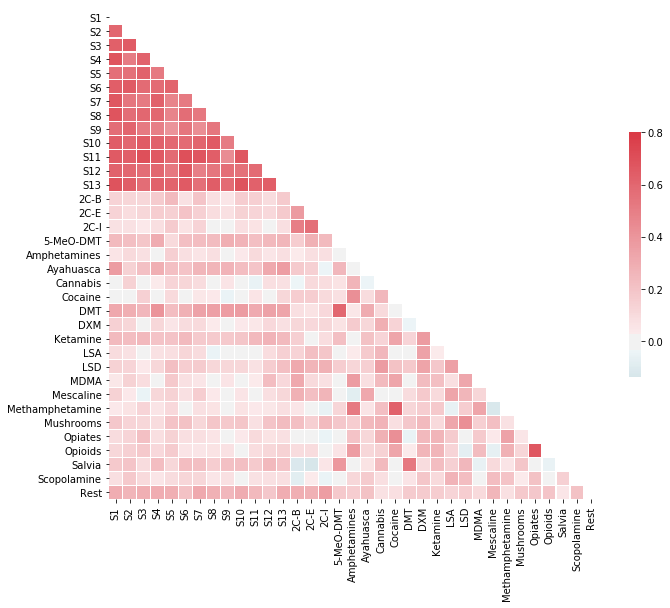

In [25]:
fig

In [85]:
#average similarity between lab subjects' 1-13 reports and any of the drug corpora
df.iloc[0:13, 13:].mean()

2C-B               0.136176
2C-E               0.132911
2C-I               0.069951
5-MeO-DMT          0.234084
Amphetamines       0.070882
Ayahuasca          0.257128
Cannabis           0.057068
Cocaine            0.044516
DMT                0.324681
DXM                0.076151
Ketamine           0.217586
LSA                0.059282
LSD                0.135801
MDMA               0.082377
Mescaline          0.073389
Methamphetamine    0.060268
Mushrooms          0.163449
Opiates            0.090208
Opioids            0.100507
Salvia             0.192636
Scopolamine        0.089196
Rest               0.272497
dtype: float32